# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def one_sample_ttest(sample, popmean, alpha):
    # Visualize sample distribution for normality 
    sns.histplot(sample, kde=True, color='skyblue')
    plt.title("Sample Distribution (Check for Normality)")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

    # Population mean 
    print(f"Population mean (μ): {popmean}")

    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)
    print(f"Sample mean (x̄): {sample_mean:.2f}")

    # Sample Standard Deviation (σ) using NumPy
    sample_std = np.std(sample, ddof=1)
    print(f"Sample standard deviation (s): {sample_std:.2f}")

    # Degrees of freedom
    n = len(sample)
    df = n - 1
    print(f"Degrees of freedom (df): {df}")

    # Calculate the critical t-value (two-tailed)
    t_critical = stats.t.ppf(1 - alpha/2, df)
    print(f"Critical t-value (±tα/2): ±{t_critical:.4f}")

    # Calculate the t-value and p-value      
    t_stat, p_value = stats.ttest_1samp(sample, popmean)
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value (two-tailed): {p_value:.4e}")

    # Identify if the results are significant or not
    if p_value < alpha:
        print("✅ Reject H₀: The sample mean is significantly different from the population mean.")
    else:
        print("❌ Fail to reject H₀: No significant difference from the population mean.")

    # return results
    return t_stat, p_value, t_critical


### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

=== Exercise 2 — Original Sample ===


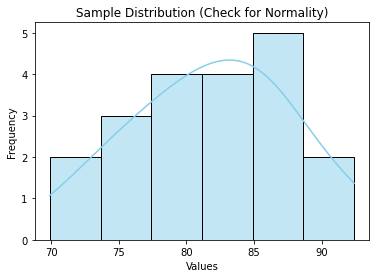

Population mean (μ): 65
Sample mean (x̄): 81.80
Sample standard deviation (s): 5.92
Degrees of freedom (df): 19
Critical t-value (±tα/2): ±2.0930
T-statistic: 12.6876
P-value (two-tailed): 1.0053e-10
✅ Reject H₀: The sample mean is significantly different from the population mean.

=== Exercise 2 — Corrected Sample ===


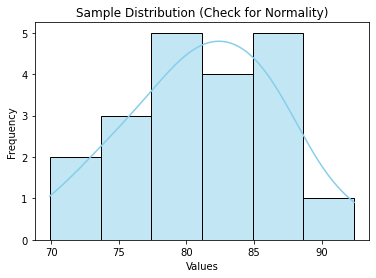

Population mean (μ): 65
Sample mean (x̄): 81.30
Sample standard deviation (s): 5.52
Degrees of freedom (df): 19
Critical t-value (±tα/2): ±2.0930
T-statistic: 13.2021
P-value (two-tailed): 5.0834e-11
✅ Reject H₀: The sample mean is significantly different from the population mean.

=== Bonus: Effect Size (Cohen’s d) ===
Cohen’s d for original sample: 2.84
Cohen’s d for corrected sample: 2.95


In [5]:
# Original data
sample1 = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1,
           81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9,
           69.9, 77.2, 79.3, 83.3]

# Corrected data (replace 90.9 → 80.9)
sample2 = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1,
           81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9,
           69.9, 77.2, 79.3, 83.3]

# Given parameters
popmean = 65
alpha = 0.05

# --- Test 1: Original Sample ---
print("=== Exercise 2 — Original Sample ===")
t_stat1, p_val1, t_crit1 = one_sample_ttest(sample1, popmean, alpha)

# --- Test 2: Corrected Sample (after fixing 90.9 → 80.9) ---
print("\n=== Exercise 2 — Corrected Sample ===")
t_stat2, p_val2, t_crit2 = one_sample_ttest(sample2, popmean, alpha)

# --- Bonus: Effect Size (Cohen’s d) ---
def cohens_d(sample, popmean):
    sample = np.array(sample)
    return (np.mean(sample) - popmean) / np.std(sample, ddof=1)

d1 = cohens_d(sample1, popmean)
d2 = cohens_d(sample2, popmean)

print("\n=== Bonus: Effect Size (Cohen’s d) ===")
print(f"Cohen’s d for original sample: {d1:.2f}")
print(f"Cohen’s d for corrected sample: {d2:.2f}")


Cohen’s d indicates an extremely large effect size, meaning the online training had a very strong positive impact on students’ test performance.

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 